### <center>Shearlets 3D Matlab </center>

In [8]:
addpath(genpath('~/Desktop/Shearlab/ShearLab3Dv11_2/'))

[Warning: Function isrow has the same name as a MATLAB builtin. We suggest you
rename the function to avoid a potential name conflict.] 
[> In path at 109
  In addpath at 86
  In pymat_eval at 31
  In matlabserver at 24]


In [16]:
vid = VideoReader('Turbulance.mp4');

In [17]:
frames = get_frames(vid, 1, 10)

Undefined function 'get_frames' for input arguments of type 'VideoReader'.


In [11]:
while hasFrame(vidObj)
    video = readFrame(vidObj);
end

Undefined function 'hasFrame' for input arguments of type 'VideoReader'.


In [2]:
%%settings
sigma = 30;
scales = 2;
shearLevels = [1 1];
thresholdingFactor = 3;
directionalFilter = modulate2(dfilters('cd','d')./sqrt(2),'c');

---SLExampleVideoDenoising---
loading video...


In [9]:
%%load data
load missamericaseqsmall;
X = X;
%X = double(X);

In [ ]:
X

In [4]:
size(X(:,:,2))

ans =

    64    64


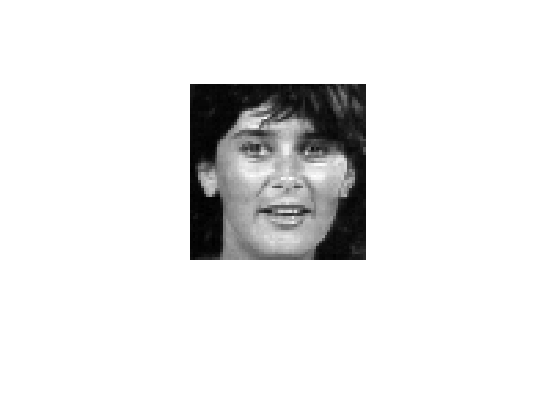

In [6]:

imshow(mat2gray(X(:,:,64)));


In [7]:
1+1

ans =

     2


In [ ]:
%%add noise
Xnoisy = X + sigma*randn(size(X));

In [ ]:
elapsedTime = toc;
fprintf([num2str(elapsedTime), ' s\n']);
tic;
fprintf('generating shearlet system... ');

%%create shearlets
shearletSystem = SLgetShearletSystem3D(0,size(X,1),size(X,2),size(X,3),scales,shearLevels,0,directionalFilter);

elapsedTime = toc;
fprintf([num2str(elapsedTime), ' s\n']);
tic;
fprintf('decomposition, thresholding and reconstruction... ');

%%decomposition
coeffs = SLsheardec3D(Xnoisy,shearletSystem);

%%thresholding
coeffs = coeffs.*(abs(coeffs) > thresholdingFactor*reshape(repmat(shearletSystem.RMS,[size(X,1)*size(X,2)*size(X,3) 1]),[size(X,1),size(X,2),size(X,3),length(shearletSystem.RMS)])*sigma);

%%reconstruction
Xrec = SLshearrec3D(coeffs,shearletSystem);

elapsedTime = toc;
fprintf([num2str(elapsedTime), ' s\n']);

%%compute psnr
PSNR = SLcomputePSNR(X,Xrec);

fprintf(['PSNR: ', num2str(PSNR) , ' db\n']);